In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers.legacy import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
train = ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory('basedata/train/', 
                                                            image_size=(200,200), 
                                                            batch_size=3,
                                                            color_mode='rgb'
                                                            )

Found 2626 files belonging to 39 classes.


2023-12-05 11:47:55.127812: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-05 11:47:55.127836: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-05 11:47:55.127839: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-05 11:47:55.128411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-05 11:47:55.128712: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
train_dataset.class_names

['adho_mukha_svanasana',
 'adho_mukha_vrksasana',
 'alanasana',
 'anjaneyasana',
 'ardha_chandrasana',
 'ardha_matsyendrasana',
 'ardha_pincha_mayurasana',
 'baddha_konasana',
 'bakasana',
 'balasana',
 'bitilasana',
 'camatkarasana',
 'dhanurasana',
 'eka_pada_rajakapotasana',
 'garudasana',
 'halasana',
 'hanumanasana',
 'malasana',
 'marjaryasana',
 'padmasana',
 'parsvottanasana',
 'paschimottanasana',
 'phalakasana',
 'pincha_mayurasana',
 'salamba_bhujangasana',
 'salamba_sarvangasana',
 'setu_bandha_sarvangasana',
 'urdhva_dhanurasana',
 'urdhva_mukha_svsnssana',
 'ustrasana',
 'utkatasana',
 'uttanasana',
 'utthita_hasta_padangusthasana',
 'utthita_parsvakonasana',
 'vasisthasana',
 'virabhadrasana_one',
 'virabhadrasana_three',
 'virabhadrasana_two',
 'vrksasana']

In [5]:
yoga_pose = {
 0: 'ADHO MUKHA SVANASANA',
 1: 'ADHO MUKHA VRKSASANA',
 2: 'ALANASANA',
 3: 'ANJANEYASANA',
 4: 'ARDHA CHANDRASANA',
 5: 'ARDHA MATSYENDRASANA',
 6: 'ARDHA PINCHA MAYURASANA',
 7: 'BADDHA KONASANA',
 8: 'BAKASANA',
 9: 'BALASANA',
 10: 'BITILASANA',
 11: 'CAMATKARASANA',
 12: 'DHANURASANA',
 13: 'EKA PADA RAJAKAPOTASANA',
 14: 'GARUDASANA',
 15: 'HALASANA',
 16: 'HANUMANASANA',
 17: 'MALASANA',
 18: 'MARJARYASANA',
 19: 'PADMASANA',
 20: 'PARSVOTTANASANA',
 21: 'PASCHIMOTTANASANA',
 22: 'PHALAKASANA',
 23: 'PINCHA MAYURASANA',
 24: 'SALAMBA BHUJANGASANA',
 25: 'SALAMBA SARVANGASANA',
 26: 'SETU BANDHA SARVANGASANA',
 27: 'URDHVA DHANURASANA',
 28: 'URDHVA MUKHA SVSNSSANA',
 29: 'USTRASANA',
 30: 'UTKATASANA',
 31: 'UTTANASANA',
 32: 'UTTHITA HASTA PADANGUSTHASANA',
 33: 'UTTHITA PARSVAKONASANA',
 34: 'VASISTHASANA',
 35: 'VIRABHADRASANA ONE',
 36: 'VIRABHADRASANA THREE',
 37: 'VIRABHADRASANA TWO',
 38: 'VRKSASANA'
}


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(39, activation='softmax')
])

In [8]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset, 
                      epochs=25)

Epoch 1/25


2023-11-23 12:57:23.465998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


281/876 [========>.....................] - ETA: 24s - loss: 57.2766 - accuracy: 0.0474

2023-11-23 12:57:36.380902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


876/876 [==============================] - 39s 43ms/step - loss: 22.8235 - accuracy: 0.0510
Epoch 2/25
281/876 [========>.....................] - ETA: 24s - loss: 7.1432 - accuracy: 0.1068

2023-11-23 12:58:13.737113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


876/876 [==============================] - 37s 42ms/step - loss: 7.1311 - accuracy: 0.1523
Epoch 3/25
279/876 [========>.....................] - ETA: 24s - loss: 6.8764 - accuracy: 0.3106

2023-11-23 12:58:50.300087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


876/876 [==============================] - 37s 42ms/step - loss: 5.6469 - accuracy: 0.3423
Epoch 4/25
283/876 [========>.....................] - ETA: 24s - loss: 4.6158 - accuracy: 0.5018

2023-11-23 12:59:27.064281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


876/876 [==============================] - 37s 42ms/step - loss: 4.2287 - accuracy: 0.5057
Epoch 5/25
255/876 [=======>......................] - ETA: 26s - loss: 12.4065 - accuracy: 0.6144

KeyboardInterrupt: 

In [6]:
yoga_model = tf.keras.models.load_model('yoga_neural_network/')

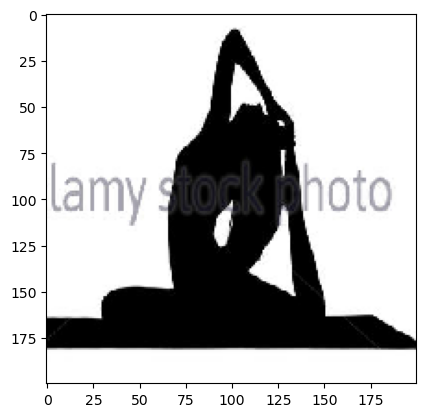

1/1 [==============================] - 0s 167ms/step
the pose is EKA PADA RAJAKAPOTASANA


2023-12-05 11:47:57.286889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


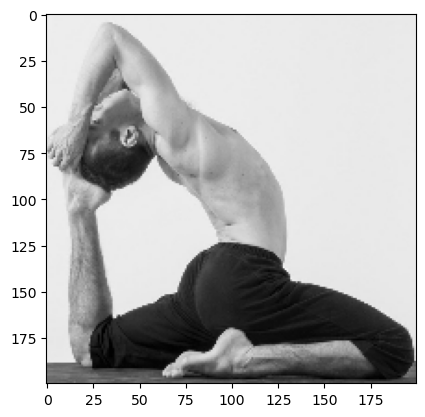

1/1 [==============================] - 0s 12ms/step
the pose is EKA PADA RAJAKAPOTASANA


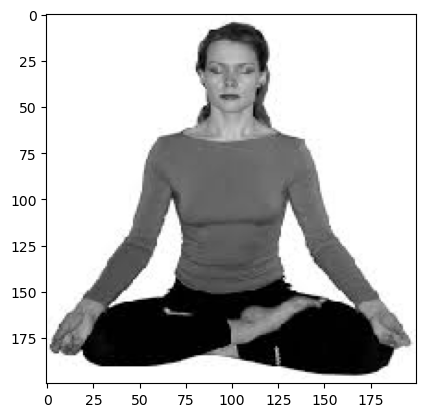

1/1 [==============================] - 0s 13ms/step
the pose is PADMASANA


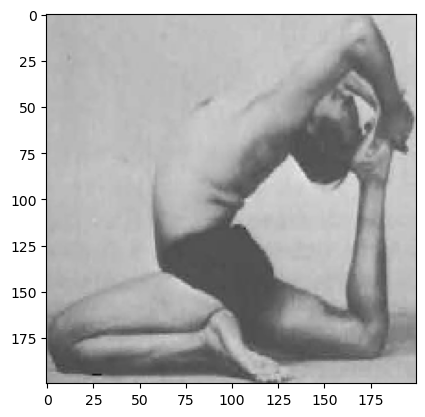

1/1 [==============================] - 0s 11ms/step
the pose is EKA PADA RAJAKAPOTASANA


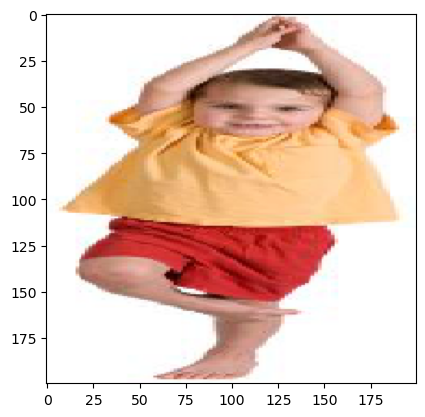

1/1 [==============================] - 0s 10ms/step
the pose is VRKSASANA


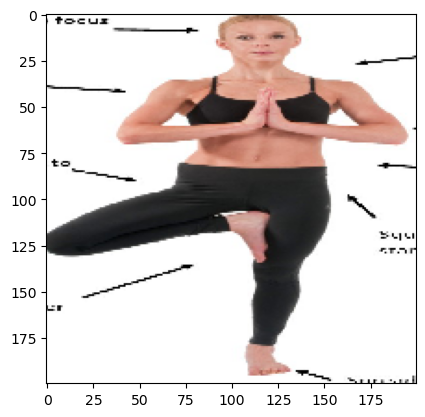

1/1 [==============================] - 0s 10ms/step
the pose is VRKSASANA


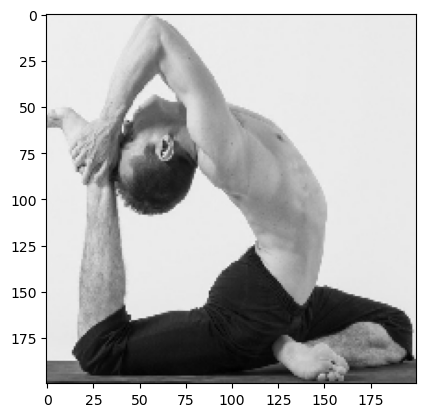

1/1 [==============================] - 0s 10ms/step
the pose is EKA PADA RAJAKAPOTASANA


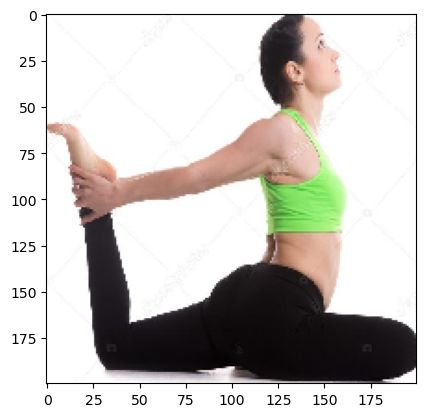

1/1 [==============================] - 0s 11ms/step
the pose is EKA PADA RAJAKAPOTASANA


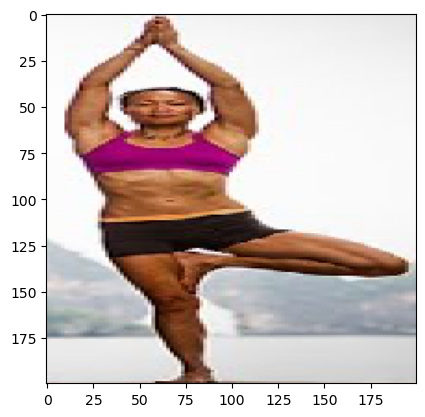

1/1 [==============================] - 0s 10ms/step
the pose is VRKSASANA


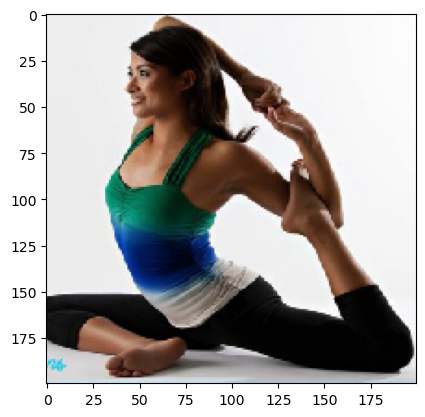

1/1 [==============================] - 0s 10ms/step
the pose is EKA PADA RAJAKAPOTASANA


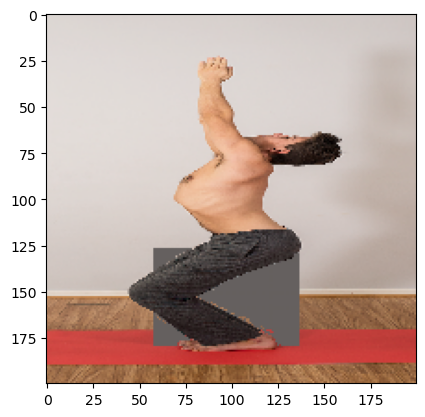

1/1 [==============================] - 0s 11ms/step
the pose is UTKATASANA


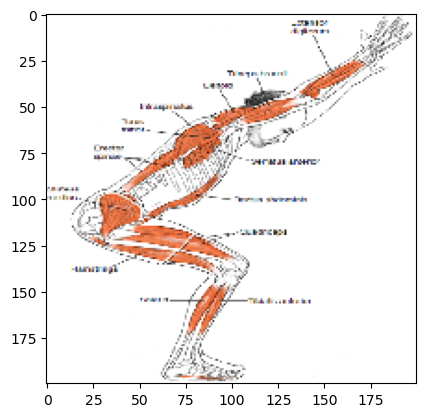

1/1 [==============================] - 0s 15ms/step
the pose is UTKATASANA


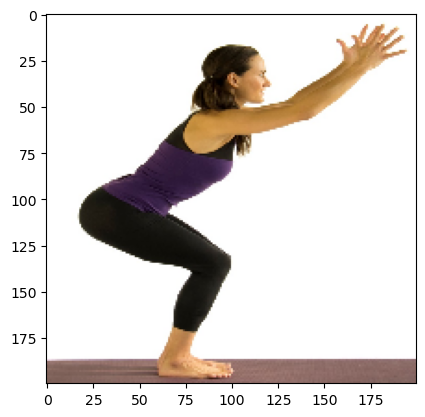

1/1 [==============================] - 0s 11ms/step
the pose is UTKATASANA


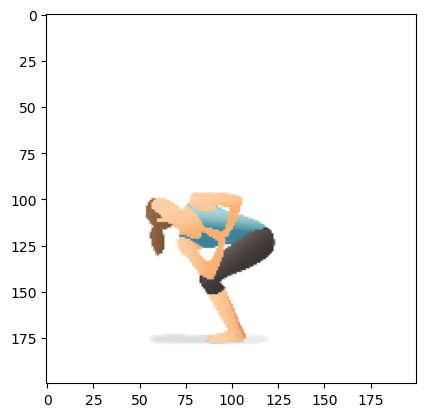

1/1 [==============================] - 0s 10ms/step
the pose is UTKATASANA


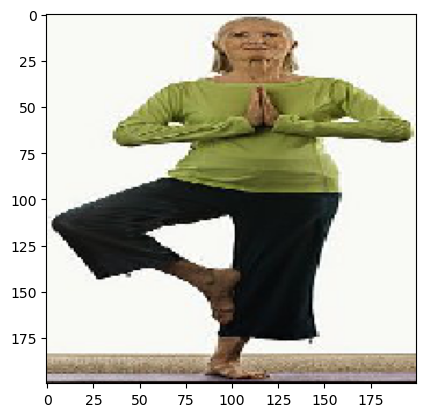

1/1 [==============================] - 0s 10ms/step
the pose is VRKSASANA


In [7]:
dir_path = 'basedata/test/'

for i in os.listdir(dir_path):
    if (i == '.DS_Store'):
        continue
    img = image.load_img(dir_path + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = yoga_model.predict(images)
    idx = np.argmax(val)
    print(f'the pose is {yoga_pose[idx]}')

In [79]:
model.save("yoga_neural_network")

INFO:tensorflow:Assets written to: yoga_neural_network/assets


INFO:tensorflow:Assets written to: yoga_neural_network/assets
